## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['CNT_FAM_MEMBERS_BINNED'] = pd.cut(app_train["CNT_FAM_MEMBERS"], 10)
app_train['CNT_FAM_MEMBERS_BINNED'].value_counts()

(0.981, 2.9]    226204
(2.9, 4.8]       77298
(4.8, 6.7]        3886
(6.7, 8.6]         101
(8.6, 10.5]          9
(14.3, 16.2]         3
(12.4, 14.3]         3
(10.5, 12.4]         3
(18.1, 20.0]         2
(16.2, 18.1]         0
Name: CNT_FAM_MEMBERS_BINNED, dtype: int64

/anaconda/envs/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


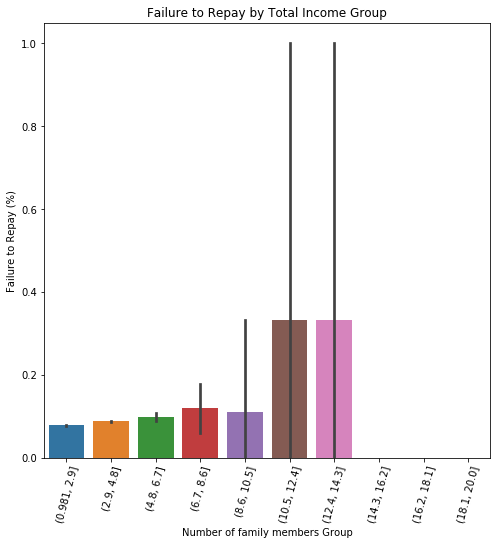

In [4]:
plt.figure(figsize = (8, 8))
px = 'CNT_FAM_MEMBERS_BINNED'
py = 'TARGET'
sns.barplot(px, py, data=app_train)
plt.xticks(rotation = 75); plt.xlabel('Number of family members Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Total Income Group');

In [5]:
app_train['HOUR_APPR_PROCESS_START_BINNED'] = pd.cut(app_train["HOUR_APPR_PROCESS_START"], range(24))
app_train['HOUR_APPR_PROCESS_START_BINNED'].value_counts()

(9, 10]     37722
(10, 11]    37229
(11, 12]    34233
(12, 13]    30959
(13, 14]    27682
(8, 9]      27384
(14, 15]    24839
(15, 16]    20385
(7, 8]      15127
(16, 17]    14900
(6, 7]       9131
(17, 18]     9049
(5, 6]       5842
(18, 19]     3848
(4, 5]       3638
(3, 4]       2090
(2, 3]       1230
(19, 20]     1196
(20, 21]      405
(1, 2]        305
(21, 22]      150
(0, 1]         86
(22, 23]       41
Name: HOUR_APPR_PROCESS_START_BINNED, dtype: int64

/anaconda/envs/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


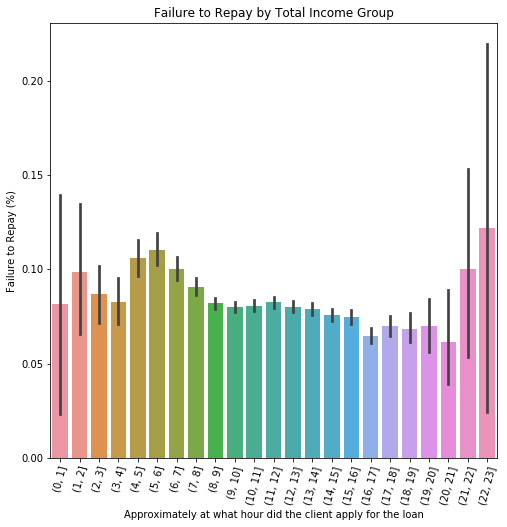

In [6]:
plt.figure(figsize = (8, 8))
px = 'HOUR_APPR_PROCESS_START_BINNED'
py = 'TARGET'
sns.barplot(px, py, data=app_train)
plt.xticks(rotation = 75); plt.xlabel('Approximately at what hour did the client apply for the loan'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Total Income Group');